In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
N = 6
a = 0.5

In [2]:
#Funciones
def campo(x,y,z):
    f_x = lambda phi: (x-a*np.cos(phi))/((x**2+y**2+z**2+a**2-2*a*x*np.cos(phi)-2*a*y*np.sin(phi)))**(3/2)
    f_y = lambda phi: (y-a*np.sin(phi))/((x**2+y**2+z**2+a**2-2*a*x*np.cos(phi)-2*a*y*np.sin(phi)))**(3/2)
    f_z = lambda phi: (z)/((x**2+y**2+z**2+a**2-2*a*x*np.cos(phi)-2*a*y*np.sin(phi)))**(3/2)
    
    return f_x,f_y,f_z

In [22]:
#Integrar

def Integral(x,y,z):
    raices, pesos = np.polynomial.legendre.leggauss(20)

    c = 0
    b = 2*np.pi

    tk = (raices*(b-c)+ c + b)/2
    f_x,f_y,f_z = campo(x,y,z)
    sumandox = np.sum(pesos*f_x(tk))
    sumandoy = np.sum(pesos*f_y(tk))
    sumandoz = np.sum(pesos*f_z(tk))

    integral_x = (sumandox)*(b-c)/2
    integral_y = (sumandoy)*(b-c)/2
    integral_z = (sumandoz)*(b-c)/2
    
    Ex = (integral_x)/(2*np.pi)
    Ey = (integral_y)/(2*np.pi)
    Ez = (integral_z)/(2*np.pi)
    Ex = round(Ex,5)
    Ey = round(Ey,5)
    Ez = round(Ez,5)
    return Ex,Ey,Ez

Integral(0.6,0.6,1)

(0.21152, 0.21152, 0.43865)

In [31]:
x=np.linspace(-0.6,0.6,N)
y=np.linspace(-0.6,0.6,N)
z=np.linspace(-0.6,0.6,N)
for i in range(len(x)):
    print("Punto: "+str(x[i]))
    print("Integral: "+str(Integral(x[i],y[i],z[i])))

Punto: -0.6
Integral: (-0.44648, -0.44649, -0.64094)
Punto: -0.36
Integral: (-0.61226, -0.61328, -1.84039)
Punto: -0.12
Integral: (0.39559, 0.39558, -1.11064)
Punto: 0.12
Integral: (-0.39557, -0.39557, 1.11063)
Punto: 0.36
Integral: (0.61292, 0.61297, 1.83951)
Punto: 0.6
Integral: (0.44649, 0.44649, 0.64094)


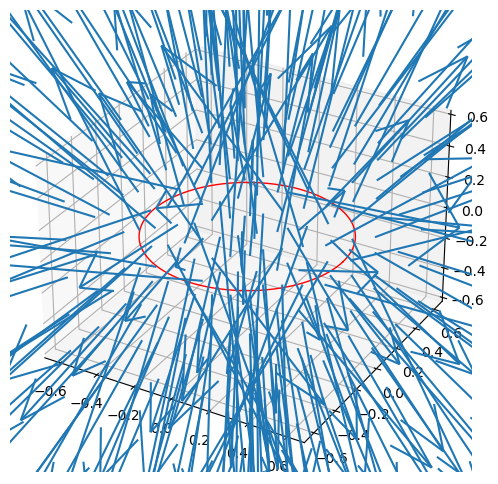

In [24]:
#Tensores
Ex = np.zeros((N,N,N))
Ey = np.zeros((N,N,N))
Ez = np.zeros((N,N,N))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')

for i in range(N):
    for j in range(N):
        for k in range(N):
            Ex[i,j,k] = Integral(x[i],x[j],x[k])[0]
            Ey[i,j,k] = Integral(x[i],x[j],x[k])[1]
            Ez[i,j,k] = Integral(x[i],x[j],x[k])[2]
            ax.quiver(x[i],y[j],z[k],Ex[i,j,k],(Ey[i,j,k]),Ez[i,j,k])
            
angulo = np.linspace(0,2*np.pi,360)
Radio = 0.5
plt.plot(Radio*np.cos(angulo),Radio*np.sin(angulo),linewidth = 1,color = "red")

In [25]:
Ex[:,:,-1]

array([[-0.44648, -0.53805, -0.57663, -0.57663, -0.53805, -0.44648],
       [-0.32283, -0.35779, -0.34807, -0.34807, -0.35779, -0.32283],
       [-0.11532, -0.11602, -0.10229, -0.10229, -0.11602, -0.11532],
       [ 0.11533,  0.11602,  0.10229,  0.10229,  0.11602,  0.11533],
       [ 0.32283,  0.35779,  0.34807,  0.34807,  0.35779,  0.32283],
       [ 0.44649,  0.53804,  0.57663,  0.57663,  0.53804,  0.44649]])

In [26]:
Ey[:,:,-1]

array([[-0.44649, -0.32282, -0.11532,  0.11532,  0.32282,  0.44649],
       [-0.53804, -0.35779, -0.11602,  0.11602,  0.35779,  0.53804],
       [-0.57663, -0.34807, -0.10229,  0.10229,  0.34807,  0.57663],
       [-0.57663, -0.34807, -0.10229,  0.10229,  0.34807,  0.57663],
       [-0.53804, -0.35779, -0.11602,  0.11602,  0.35779,  0.53804],
       [-0.44649, -0.32283, -0.11533,  0.11533,  0.32283,  0.44649]])